# Linear regression

Notebook to look at forecasts made using linear regression.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from linear_regression import get_feature
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [3]:
from linear_regression import backtest

In [8]:
ds_begin = datetime(2021, 7, 1)
ds_end = datetime(2023, 5, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

In [9]:
errors = []

## Predictions using sales

### Predictions when removing the seasonality

In [11]:
error = pd.read_csv('linear_regression/sales_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000026  0.005124  0.004202  0.832612  0.749712
1           1   -2  0.000030  0.005455  0.004572  0.943294  0.716342
2           2   -3  0.000043  0.006593  0.005290  1.101984  0.585620
3           3   -4  0.000053  0.007264  0.005936  1.613594  0.496993
4           4   -5  0.000060  0.007729  0.006502  1.969173  0.430560
5           5   -6  0.000068  0.008254  0.006847  2.291585  0.350542


We get the better results for lag 1. Let us plot the predictions.

In [12]:
(y, y_hat) = backtest('sales_raw', 1, ds_begin, ds_end, 36, True)

Text(0.5, 1.0, 'Seasonally adjusted sales')

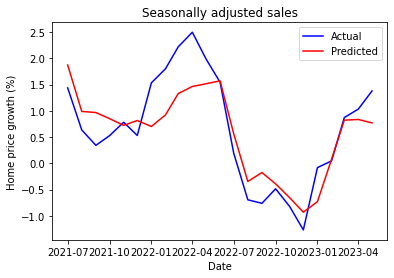

In [13]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted sales')

In [14]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA sales'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [15]:
error = pd.read_csv('linear_regression/sales_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000113  0.010626  0.009084  1.490995 -0.076434
1           1   -2  0.000124  0.011128  0.009381  2.368494 -0.180494
2           2   -3  0.000127  0.011278  0.008994  2.746699 -0.212706
3           3   -4  0.000129  0.011349  0.008882  2.708216 -0.227835
4           4   -5  0.000130  0.011390  0.009305  2.518680 -0.236890
5           5   -6  0.000131  0.011459  0.009800  2.401504 -0.251846


We get the better results for lag 1. Let us plot the predictions.

In [16]:
(y, y_hat) = backtest('sales_raw', 1, ds_begin, ds_end, 36, False)

Text(0.5, 1.0, 'Non-seasonally adjusted sales')

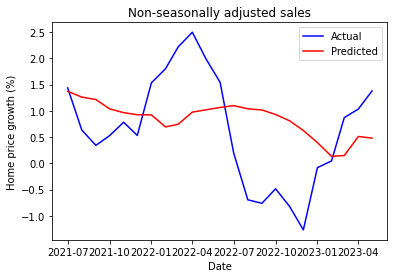

In [17]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non-seasonally adjusted sales')

In [16]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA sales'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using inventory

### Predictions when removing the seasonality

In [22]:
error = pd.read_csv('linear_regression/inventory_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000072  0.008464  0.006576  1.194535 -0.052659
1           1   -2  0.000074  0.008626  0.006594  1.208659 -0.093364
2           2   -3  0.000078  0.008809  0.006682  1.226691 -0.140279
3           3   -4  0.000081  0.008983  0.006798  1.243548 -0.185714
4           4   -5  0.000084  0.009161  0.006911  1.267511 -0.233197
5           5   -6  0.000086  0.009273  0.006997  1.284252 -0.263532


We get the better results for lag 1. Let us plot the predictions.

In [23]:
(y, y_hat) = backtest('inventory_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted inventory')

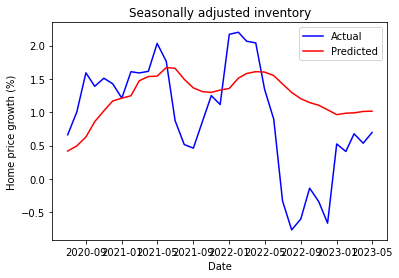

In [24]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted inventory')

In [25]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA inventory'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [26]:
error = pd.read_csv('linear_regression/inventory_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000097  0.009832  0.007911  2.008804 -0.005969
1           1   -2  0.000091  0.009534  0.007346  2.113252  0.054047
2           2   -3  0.000093  0.009653  0.007205  2.093329  0.030274
3           3   -4  0.000102  0.010078  0.007401  2.054271 -0.057009
4           4   -5  0.000111  0.010517  0.007726  2.025461 -0.151227
5           5   -6  0.000117  0.010812  0.008351  1.971309 -0.216593


We get the better results for lag 2. Let us plot the predictions.

In [27]:
(y, y_hat) = backtest('inventory_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted inventory')

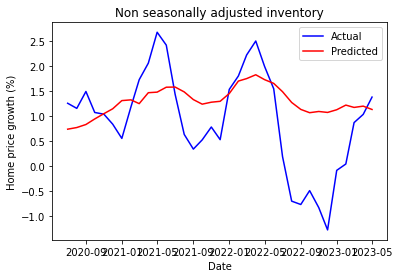

In [28]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted inventory')

In [29]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA inventory'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using new listings

### Predictions when removing the seasonality

In [30]:
error = pd.read_csv('linear_regression/new_listings_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000078  0.008805  0.007478  0.932129 -0.139236
1           1   -2  0.000079  0.008889  0.007457  0.947985 -0.161013
2           2   -3  0.000082  0.009052  0.007574  0.988694 -0.204173
3           3   -4  0.000083  0.009110  0.007553  0.976295 -0.219634
4           4   -5  0.000084  0.009165  0.007653  0.992537 -0.234373
5           5   -6  0.000082  0.009081  0.007551  0.993365 -0.211775


We get the better results for lag 1. Let us plot the predictions.

In [31]:
(y, y_hat) = backtest('new_listings_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted new listings')

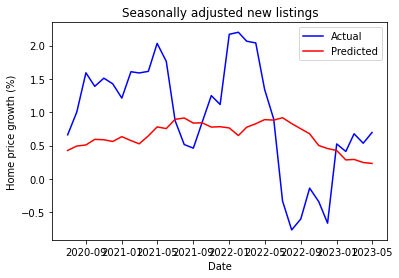

In [32]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted new listings')

In [33]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA new listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [34]:
error = pd.read_csv('linear_regression/new_listings_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000103  0.010171  0.008668  1.089197 -0.076548
1           1   -2  0.000109  0.010458  0.008840  1.603219 -0.138256
2           2   -3  0.000097  0.009832  0.008129  1.881956 -0.006142
3           3   -4  0.000083  0.009104  0.007730  1.783525  0.137472
4           4   -5  0.000082  0.009053  0.007765  1.655177  0.147076
5           5   -6  0.000098  0.009891  0.008161  1.510530 -0.018218


We get the better results for lag 5. Let us plot the predictions.

In [35]:
(y, y_hat) = backtest('new_listings_raw', 5, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted new listings')

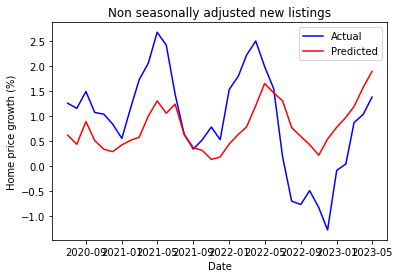

In [36]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted new listings')

In [37]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA new listings'], 'lag': [5], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using mean days to pending

### Predictions when removing the seasonality

In [39]:
error = pd.read_csv('linear_regression/mean_days_to_pending_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000073  0.008537  0.006730  1.152376 -0.070916
1           1   -2  0.000078  0.008810  0.007106  1.179422 -0.140633
2           2   -3  0.000082  0.009054  0.007471  1.194929 -0.204614
3           3   -4  0.000084  0.009149  0.007584  1.201684 -0.230031
4           4   -5  0.000085  0.009212  0.007682  1.206567 -0.247015
5           5   -6  0.000086  0.009247  0.007645  1.195547 -0.256530


We get the better results for lag 1. Let us plot the predictions.

In [40]:
(y, y_hat) = backtest('mean_days_to_pending_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted mean days to pending')

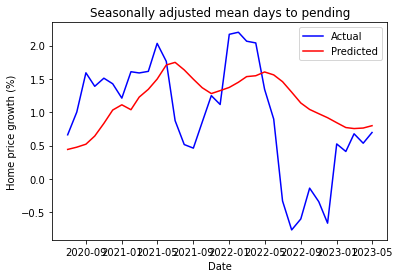

In [41]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted mean days to pending')

In [42]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA mean days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [43]:
error = pd.read_csv('linear_regression/mean_days_to_pending_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000100  0.009986  0.008102  1.679051 -0.037795
1           1   -2  0.000109  0.010420  0.008745  1.787564 -0.129958
2           2   -3  0.000112  0.010565  0.008960  1.700778 -0.161751
3           3   -4  0.000113  0.010632  0.009085  1.575356 -0.176443
4           4   -5  0.000116  0.010780  0.009162  1.495637 -0.209423
5           5   -6  0.000119  0.010931  0.009101  1.471778 -0.243624


We get the better results for lag 1. Let us plot the predictions.

In [44]:
(y, y_hat) = backtest('mean_days_to_pending_raw', 1, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted mean days to pending')

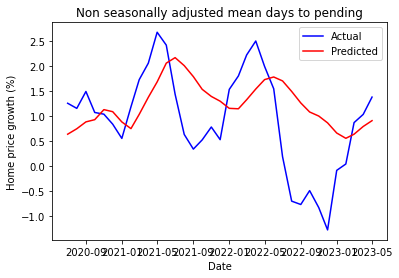

In [45]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted mean days to pending')

In [46]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA mean days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using mean sale-to-list ratio

### Predictions when removing the seasonality

In [47]:
error = pd.read_csv('linear_regression/mean_sale_to_list_ratio_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000071  0.008427  0.006164  1.052933 -0.043534
1           1   -2  0.000083  0.009115  0.006771  1.140679 -0.220972
2           2   -3  0.000089  0.009451  0.007139  1.189449 -0.312634
3           3   -4  0.000091  0.009526  0.007294  1.215748 -0.333616
4           4   -5  0.000089  0.009430  0.007373  1.235433 -0.306749
5           5   -6  0.000087  0.009338  0.007393  1.254551 -0.281431


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [48]:
(y, y_hat) = backtest('mean_sale_to_list_ratio_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted mean sale-to-list ratio')

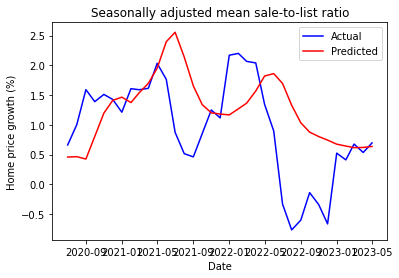

In [49]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted mean sale-to-list ratio')

In [50]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA mean sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [51]:
error = pd.read_csv('linear_regression/mean_sale_to_list_ratio_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000091  0.009553  0.007663  1.437720  0.050134
1           1   -2  0.000110  0.010498  0.008718  1.735155 -0.146897
2           2   -3  0.000119  0.010893  0.009405  1.842077 -0.234876
3           3   -4  0.000121  0.011013  0.009647  1.817067 -0.262364
4           4   -5  0.000125  0.011161  0.009809  1.744167 -0.296458
5           5   -6  0.000127  0.011260  0.009726  1.660826 -0.319528


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [52]:
(y, y_hat) = backtest('mean_sale_to_list_ratio_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted mean sale-to-list ratio')

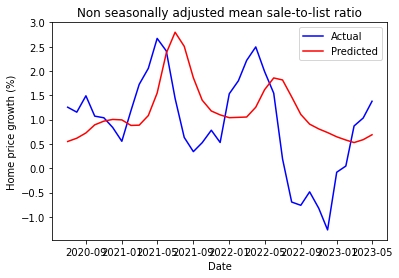

In [53]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted mean sale-to-list ratio')

In [54]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA mean sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using median days to pending

### Predictions when removing the seasonality

In [55]:
error = pd.read_csv('linear_regression/median_days_to_pending_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000057  0.007528  0.005780  1.007931  0.167152
1           1   -2  0.000059  0.007685  0.005744  1.010051  0.132155
2           2   -3  0.000061  0.007835  0.005784  1.031771  0.097802
3           3   -4  0.000065  0.008087  0.006192  1.085545  0.038926
4           4   -5  0.000071  0.008422  0.006556  1.131095 -0.042300
5           5   -6  0.000079  0.008912  0.006837  1.182425 -0.167061


We get the better results for lag 1. Let us plot the predictions.

In [56]:
(y, y_hat) = backtest('median_days_to_pending_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted median days to pending')

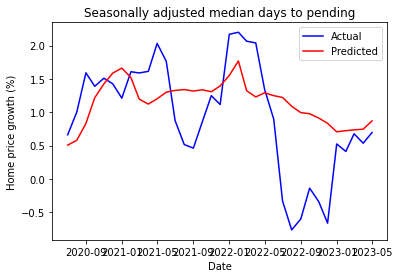

In [57]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted median days to pending')

In [58]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA median days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [59]:
error = pd.read_csv('linear_regression/median_days_to_pending_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000077  0.008750  0.006679  1.151775  0.203158
1           1   -2  0.000093  0.009644  0.007908  1.465750  0.032103
2           2   -3  0.000105  0.010241  0.008697  1.670501 -0.091503
3           3   -4  0.000113  0.010636  0.009101  1.669043 -0.177395
4           4   -5  0.000119  0.010890  0.009399  1.634758 -0.234297
5           5   -6  0.000122  0.011053  0.009435  1.587410 -0.271543


We get the better results for lag 1. Let us plot the predictions.

In [60]:
(y, y_hat) = backtest('median_days_to_pending_raw', 1, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted median days to pending')

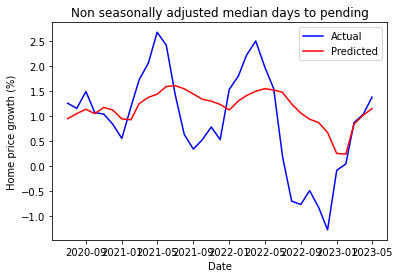

In [61]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted median days to pending')

In [62]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA median days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using median sale-to-list ratio

### Predictions when removing the seasonality

In [63]:
error = pd.read_csv('linear_regression/median_sale_to_list_ratio_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000066  0.008098  0.006079  1.072085  0.036380
1           1   -2  0.000076  0.008731  0.006445  1.135054 -0.120218
2           2   -3  0.000082  0.009069  0.006540  1.145650 -0.208708
3           3   -4  0.000084  0.009177  0.006675  1.170775 -0.237687
4           4   -5  0.000085  0.009244  0.007112  1.244363 -0.255742
5           5   -6  0.000087  0.009322  0.007238  1.289492 -0.276961


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [64]:
(y, y_hat) = backtest('median_sale_to_list_ratio_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted median sale-to-list ratio')

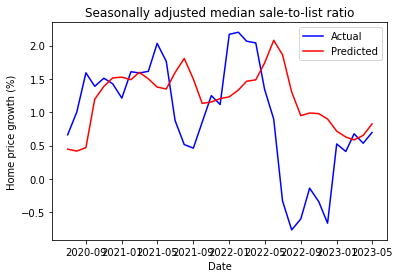

In [65]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted median sale-to-list ratio')

In [66]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA median sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [68]:
error = pd.read_csv('linear_regression/median_sale_to_list_ratio_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000090  0.009478  0.007726  1.363555  0.065170
1           1   -2  0.000106  0.010319  0.008514  1.712409 -0.108160
2           2   -3  0.000116  0.010786  0.009136  1.833969 -0.210835
3           3   -4  0.000123  0.011108  0.009711  1.777912 -0.284175
4           4   -5  0.000129  0.011338  0.010033  1.742512 -0.337916
5           5   -6  0.000129  0.011338  0.009923  1.743198 -0.337794


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [69]:
(y, y_hat) = backtest('median_sale_to_list_ratio_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted median sale-to-list ratio')

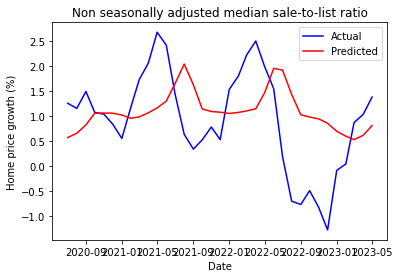

In [70]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted median sale-to-list ratio')

In [71]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA median sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using newly pending listings

### Predictions when removing the seasonality

In [72]:
error = pd.read_csv('linear_regression/newly_pending_listings_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000055  0.007390  0.005625  0.898643  0.197549
1           1   -2  0.000058  0.007635  0.005974  0.992793  0.143289
2           2   -3  0.000067  0.008184  0.006380  1.015367  0.015638
3           3   -4  0.000073  0.008573  0.006935  1.075759 -0.080055
4           4   -5  0.000076  0.008741  0.007072  1.110561 -0.122817
5           5   -6  0.000076  0.008734  0.007232  1.137787 -0.120995


We get the better results for lag 1. Let us plot the predictions.

In [73]:
(y, y_hat) = backtest('newly_pending_listings_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted newly pending listings')

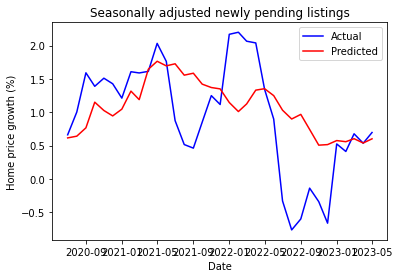

In [74]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted newly pending listings')

In [75]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA newly pending listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [76]:
error = pd.read_csv('linear_regression/newly_pending_listings_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000082  0.009030  0.007270  1.169872  0.151329
1           1   -2  0.000100  0.009988  0.008391  1.399530 -0.038232
2           2   -3  0.000110  0.010508  0.008991  1.639751 -0.149055
3           3   -4  0.000113  0.010619  0.009004  1.628997 -0.173564
4           4   -5  0.000117  0.010819  0.009232  1.549303 -0.218203
5           5   -6  0.000121  0.011005  0.009413  1.550935 -0.260453


We get the better results for lag 1. Let us plot the predictions.

In [77]:
(y, y_hat) = backtest('newly_pending_listings_raw', 1, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted newly pending listings')

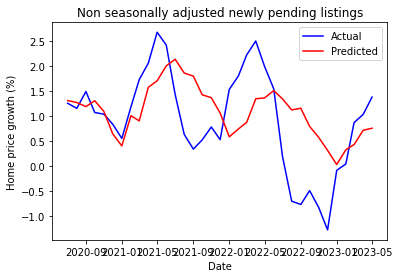

In [78]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted newly pending listings')

In [79]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA newly pending listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage of listings with price cut

### Predictions when removing the seasonality

In [80]:
error = pd.read_csv('linear_regression/pct_listings_price_cut_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000028  0.005329  0.004637  0.556843  0.582740
1           1   -2  0.000039  0.006237  0.005246  0.647161  0.428392
2           2   -3  0.000048  0.006954  0.005826  0.742590  0.289445
3           3   -4  0.000061  0.007829  0.006623  0.915248  0.099185
4           4   -5  0.000072  0.008486  0.007257  1.068905 -0.058330
5           5   -6  0.000079  0.008898  0.007444  1.115413 -0.163443


We get the better results for lag 1. Let us plot the predictions.

In [81]:
(y, y_hat) = backtest('pct_listings_price_cut_raw', 1, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted pct listings with price cut')

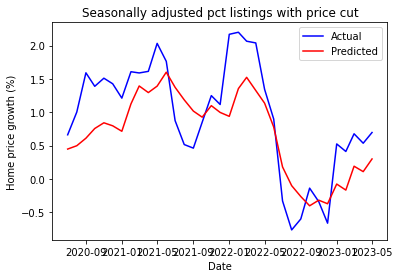

In [82]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted pct listings with price cut')

In [83]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct listings with price cut'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [84]:
error = pd.read_csv('linear_regression/pct_listings_price_cut_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000039  0.006214  0.005159  0.732791  0.598133
1           1   -2  0.000029  0.005343  0.004599  0.987858  0.702913
2           2   -3  0.000041  0.006389  0.005098  1.173907  0.575233
3           3   -4  0.000072  0.008499  0.007041  1.483568  0.248161
4           4   -5  0.000098  0.009919  0.008445  1.210537 -0.023903
5           5   -6  0.000112  0.010564  0.009090  1.383893 -0.161479


We get the better results for lag 2. Let us plot the predictions.

In [85]:
(y, y_hat) = backtest('pct_listings_price_cut_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted pct listings with price cut')

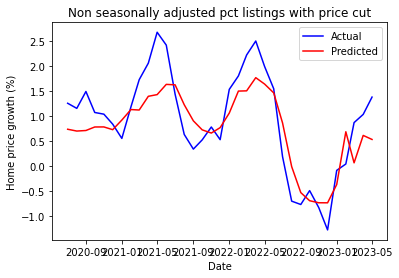

In [86]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct listings with price cut')

In [89]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct listings with price cut'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage sold above list price

### Predictions when removing the seasonality

In [90]:
error = pd.read_csv('linear_regression/pct_sold_above_list_price_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000069  0.008310  0.006018  1.054219 -0.014694
1           1   -2  0.000079  0.008885  0.006559  1.131185 -0.160076
2           2   -3  0.000085  0.009206  0.006933  1.183177 -0.245444
3           3   -4  0.000087  0.009329  0.007068  1.215520 -0.278844
4           4   -5  0.000087  0.009344  0.007214  1.242904 -0.283162
5           5   -6  0.000087  0.009312  0.007297  1.259995 -0.274156


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [91]:
(y, y_hat) = backtest('pct_sold_above_list_price_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted pct sold above list price')

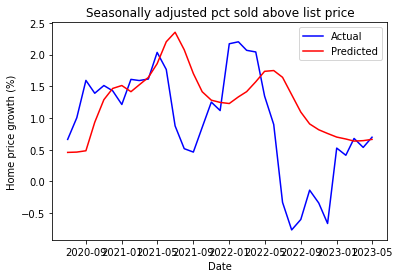

In [92]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted pct sold above list price')

In [93]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct sold above list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [94]:
error = pd.read_csv('linear_regression/pct_sold_above_list_price_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000093  0.009652  0.007715  1.531564  0.030460
1           1   -2  0.000108  0.010399  0.008613  1.758243 -0.125447
2           2   -3  0.000117  0.010802  0.009273  1.837613 -0.214370
3           3   -4  0.000122  0.011053  0.009724  1.841284 -0.271460
4           4   -5  0.000128  0.011298  0.009998  1.809266 -0.328500
5           5   -6  0.000130  0.011410  0.009942  1.754989 -0.354964


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [95]:
(y, y_hat) = backtest('pct_sold_above_list_price_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted pct sold above list price')

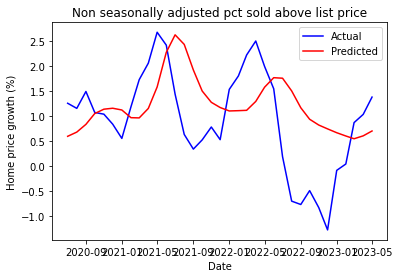

In [96]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct sold above list price')

In [97]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct sold above list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage sold below list price

### Predictions when removing the seasonality

In [98]:
error = pd.read_csv('linear_regression/pct_sold_below_list_price_raw_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000068  0.008255  0.005988  1.066766 -0.001355
1           1   -2  0.000076  0.008743  0.006437  1.132254 -0.123300
2           2   -3  0.000081  0.009022  0.006711  1.180205 -0.196020
3           3   -4  0.000084  0.009164  0.006932  1.222233 -0.234135
4           4   -5  0.000086  0.009283  0.007203  1.261862 -0.266427
5           5   -6  0.000087  0.009341  0.007259  1.274592 -0.282275


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [99]:
(y, y_hat) = backtest('pct_sold_below_list_price_raw', 2, ds_begin, ds_end, True)

Text(0.5, 1.0, 'Seasonally adjusted pct sold below list price')

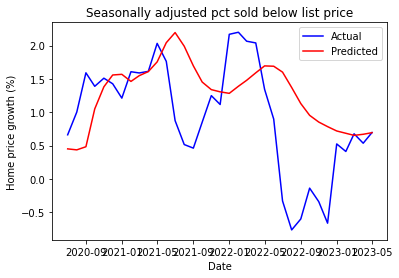

In [100]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted pct sold below list price')

In [101]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct sold below list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [102]:
error = pd.read_csv('linear_regression/pct_sold_below_list_price_raw.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000093  0.009668  0.007722  1.561068  0.027221
1           1   -2  0.000107  0.010333  0.008602  1.758754 -0.111234
2           2   -3  0.000116  0.010774  0.009279  1.826586 -0.208183
3           3   -4  0.000123  0.011106  0.009736  1.824854 -0.283758
4           4   -5  0.000129  0.011366  0.010055  1.802779 -0.344391
5           5   -6  0.000130  0.011392  0.009939  1.773206 -0.350568


We cannot use lag 1 as data are not yet available. We get the better results for lag 2. Let us plot the predictions.

In [103]:
(y, y_hat) = backtest('pct_sold_below_list_price_raw', 2, ds_begin, ds_end, False)

Text(0.5, 1.0, 'Non seasonally adjusted pct sold below list price')

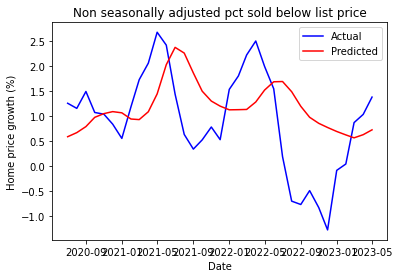

In [104]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct sold below list price')

In [105]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct sold below list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Conclusion

In [108]:
errors = pd.concat(errors)
errors.to_csv('linear_regression/errors.csv')

In [113]:
errors.iloc[-6]

feature    NSA pct listings with price cut
lag                                      1
MSE                               0.000029
RMSE                              0.005343
MAE                               0.004599
MAPE                              0.987858
R2                                0.702913
Name: 0, dtype: object